In [1]:
# THE ANALYSIS PROJECT (Using python 3)

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os # Handaling the cureent working directory 
for dirname, _, filenames in os.walk('sales.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename)) 


In [4]:
import pandas as pd # working with dataset 
import matplotlib.pyplot as plt # data visualization and graphs 
import seaborn as sns # statastical graphics use 

df = pd.read_csv("sales.csv",parse_dates=['datetime'])

In [3]:
df.head(10)

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte
5,2024-03-01,2024-03-01 15:39:47.726,card,ANON-0000-0000-0005,33.8,Americano with Milk
6,2024-03-01,2024-03-01 16:19:02.756,card,ANON-0000-0000-0006,38.7,Hot Chocolate
7,2024-03-01,2024-03-01 18:39:03.580,card,ANON-0000-0000-0007,33.8,Americano with Milk
8,2024-03-01,2024-03-01 19:22:01.762,card,ANON-0000-0000-0008,38.7,Cocoa
9,2024-03-01,2024-03-01 19:23:15.887,card,ANON-0000-0000-0008,33.8,Americano with Milk


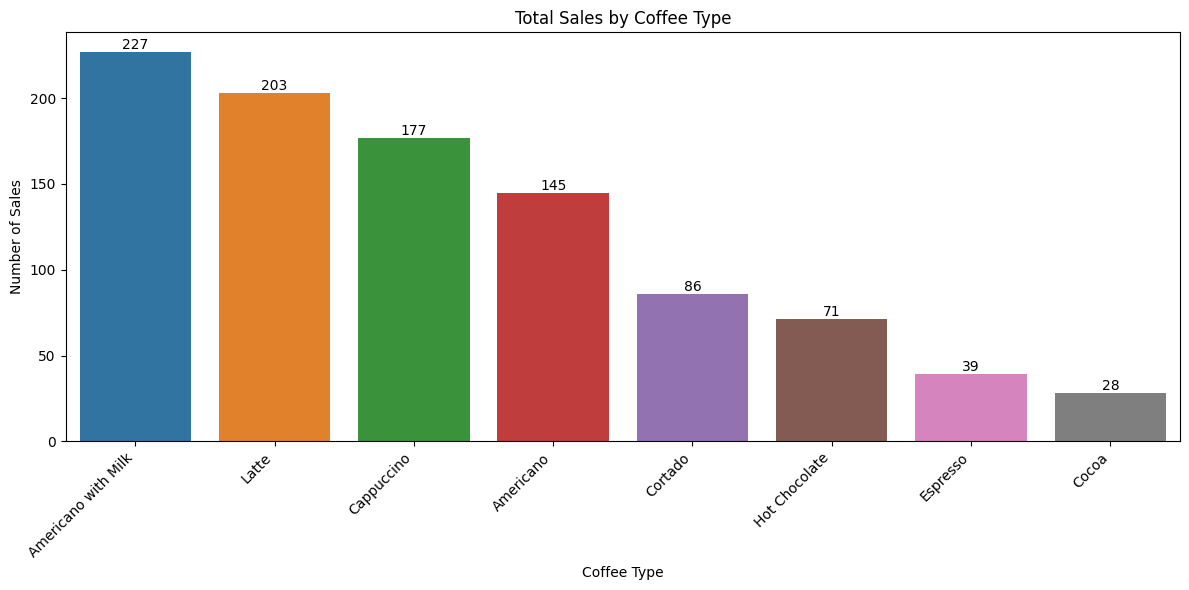

In [4]:
# 1) Total sales by coffee type
plt.figure(figsize=(12, 6))
coffee_counts = df['coffee_name'].value_counts()
sns.barplot(x=coffee_counts.index, y=coffee_counts.values)
plt.title('Total Sales by Coffee Type')
plt.xlabel('Coffee Type')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(coffee_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()

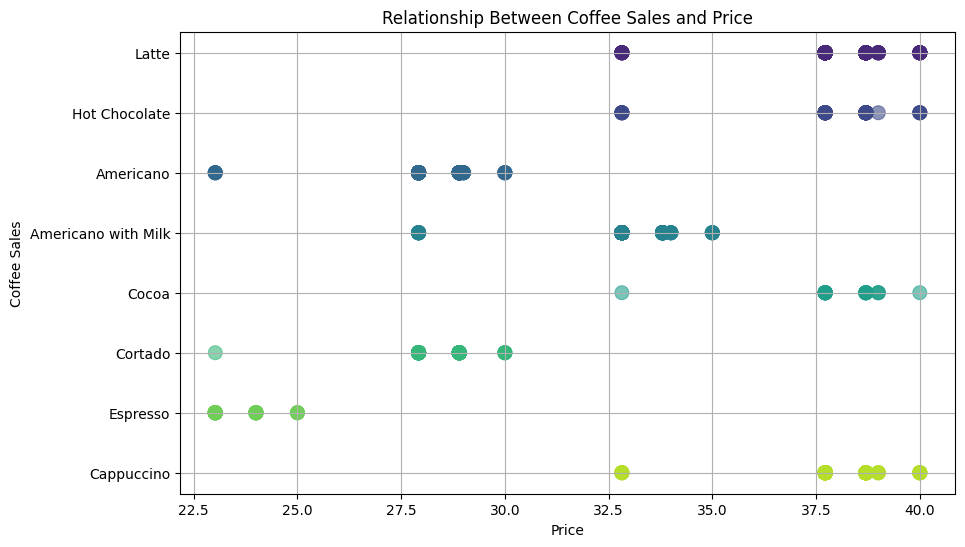

In [5]:
#2)Check if sales volume is related to price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='money', y='coffee_name', hue='coffee_name', palette='viridis', s=100, alpha=0.6, edgecolor=None, legend=False)
plt.title('Relationship Between Coffee Sales and Price')
plt.xlabel('Price')
plt.ylabel('Coffee Sales')
plt.grid(True)
plt.show()

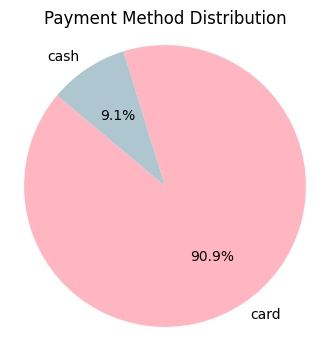

In [6]:
#3) payment methods distribution
payment = df['cash_type'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(payment, labels=payment.index, autopct='%1.1f%%', startangle=140, colors=['#FFB6C1','#AEC6CF'])
plt.title('Payment Method Distribution')
plt.axis('equal')
plt.show()

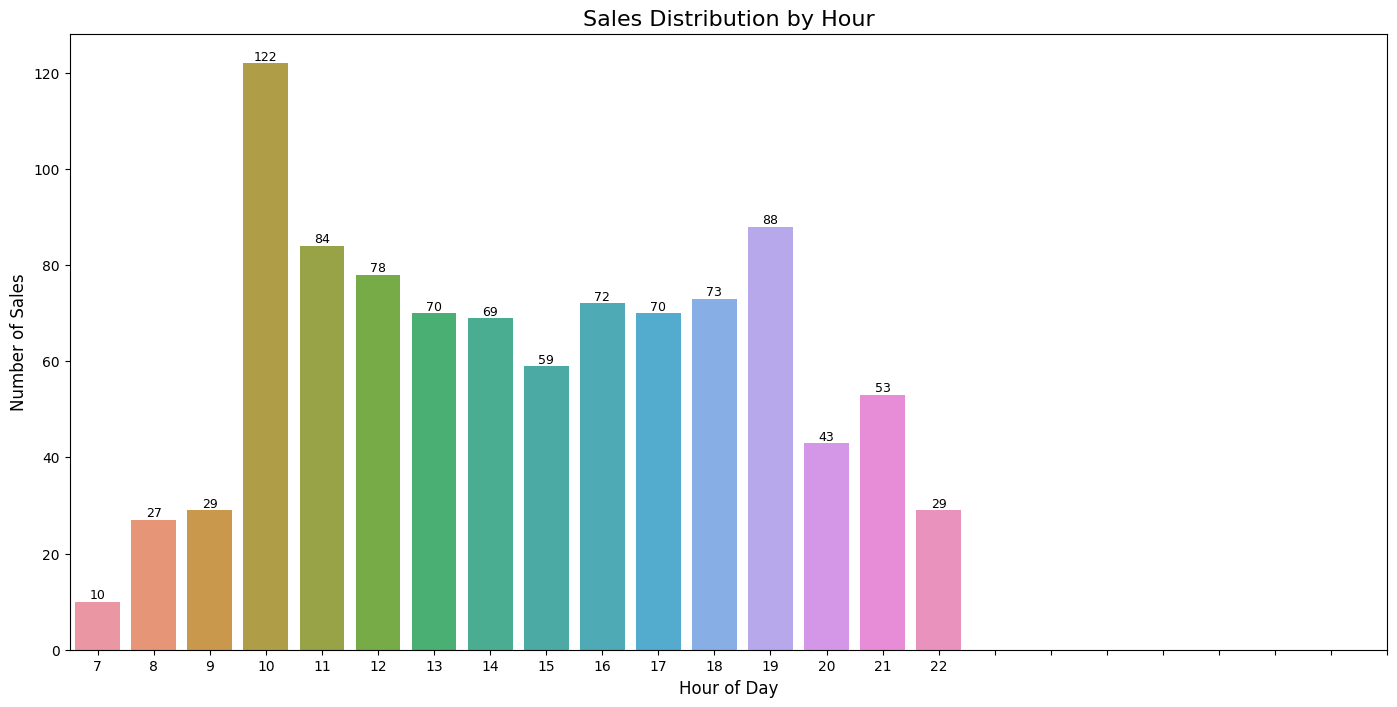

In [7]:
#4) Hours Distribution
df['hour'] = df['datetime'].dt.hour
hourly_sales = df.groupby('hour').size()

plt.figure(figsize=(17, 8))
ax = sns.barplot(x=hourly_sales.index, y=hourly_sales.values)
plt.title('Sales Distribution by Hour', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.xticks(range(0, 24), fontsize=10)
plt.yticks(fontsize=10)

# Add numbers
for i, v in enumerate(hourly_sales.values):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=9)

plt.show()